In [1]:
# importing libaries

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [2]:
# Define the LSTM model
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM, self).__init__()

        self.hidden_size = hidden_size

        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden):
        output, hidden = self.lstm(x, hidden)
        output = self.fc(output)
        return output, hidden


In [3]:
# Toy problem data
input_size = 256  # number of columns in a dataset
hidden_size = 32  # number of neurons
output_size = 256  
sequence_length = 160  # number of sequences/ number of rows
batch_size = 1
num_epochs = 20000

In [4]:
# importing data

In [5]:
# Load the .mat file
v_data = scipy.io.loadmat('v.mat')
h_data = scipy.io.loadmat('h.mat')
x_data = scipy.io.loadmat('x.mat')
h_data

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Thu Jul 20 15:02:48 2023',
 '__version__': '1.0',
 '__globals__': [],
 'h': array([[0.03949907, 0.03945555, 0.03968762, ..., 0.04081577, 0.04034067,
         0.03995187],
        [0.03949522, 0.03972834, 0.04007071, ..., 0.0406224 , 0.0405568 ,
         0.04021852],
        [0.03980837, 0.03966293, 0.04008707, ..., 0.04077249, 0.04050591,
         0.04019281],
        ...,
        [0.04915863, 0.04935256, 0.04961976, ..., 0.04917885, 0.04899574,
         0.04881741],
        [0.04904458, 0.04916197, 0.04943338, ..., 0.04902097, 0.04897786,
         0.04875013],
        [0.04913692, 0.04932824, 0.04941899, ..., 0.04888785, 0.0488357 ,
         0.04855312]])}

In [6]:
x = x_data['X']
u = h_data['h']

In [7]:
print(x.shape)
print(u.shape)
u

(201, 256)
(201, 256)


array([[0.03949907, 0.03945555, 0.03968762, ..., 0.04081577, 0.04034067,
        0.03995187],
       [0.03949522, 0.03972834, 0.04007071, ..., 0.0406224 , 0.0405568 ,
        0.04021852],
       [0.03980837, 0.03966293, 0.04008707, ..., 0.04077249, 0.04050591,
        0.04019281],
       ...,
       [0.04915863, 0.04935256, 0.04961976, ..., 0.04917885, 0.04899574,
        0.04881741],
       [0.04904458, 0.04916197, 0.04943338, ..., 0.04902097, 0.04897786,
        0.04875013],
       [0.04913692, 0.04932824, 0.04941899, ..., 0.04888785, 0.0488357 ,
        0.04855312]])

In [8]:
# Set random seed for reproducibility
torch.manual_seed(42)

In [9]:
input_data = u[0:160,:]
target_data = u[1:161, :]

test_data = u[160:200, :]
test_target = u[161:201, :]

print("test data shape", test_data.shape)
print("test target shape", test_target.shape)

print("input data shape",input_data.shape)
print("Target data shape",target_data.shape)

test data shape (40, 256)
test target shape (40, 256)
input data shape (160, 256)
Target data shape (160, 256)


In [10]:
# Convert data to tensors
input_tensor = torch.tensor(input_data).view(batch_size, sequence_length, input_size).float()
target_tensor = torch.tensor(target_data).view(batch_size, sequence_length, output_size).float()

print("input tensor shape",input_tensor.shape)
print("Target tensor shape",target_tensor.shape)

input tensor shape torch.Size([1, 160, 256])
Target tensor shape torch.Size([1, 160, 256])


In [11]:
# Convert test data to tensors
test_tensor = torch.tensor(test_data).view(batch_size, 40, input_size).float()
test_target_tensor = torch.tensor(test_target).view(batch_size, 40, output_size).float()


In [12]:
# Create LSTM instance
lstm = LSTM(input_size, hidden_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(lstm.parameters(), lr=0.01)

# Training loop
for epoch in range(num_epochs):
    # Set initial hidden state and cell state
    hidden = torch.zeros(1, batch_size, hidden_size)
    cell = torch.zeros(1, batch_size, hidden_size)

    # Forward pass
    output, (hidden, cell) = lstm(input_tensor, (hidden, cell))
    loss = criterion(output, target_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress
    if (epoch+1) % 10 == 0:
        print(f'Epoch: {epoch+1}/{num_epochs}, Loss: {loss.item():.8f}')


Epoch: 10/20000, Loss: 0.17706659
Epoch: 20/20000, Loss: 0.04944223
Epoch: 30/20000, Loss: 0.03826120
Epoch: 40/20000, Loss: 0.03608983
Epoch: 50/20000, Loss: 0.03149891
Epoch: 60/20000, Loss: 0.03100103
Epoch: 70/20000, Loss: 0.03076473
Epoch: 80/20000, Loss: 0.03058243
Epoch: 90/20000, Loss: 0.03055021
Epoch: 100/20000, Loss: 0.03016698
Epoch: 110/20000, Loss: 0.02829106
Epoch: 120/20000, Loss: 0.02481548
Epoch: 130/20000, Loss: 0.02091661
Epoch: 140/20000, Loss: 0.01758108
Epoch: 150/20000, Loss: 0.01504118
Epoch: 160/20000, Loss: 0.01308300
Epoch: 170/20000, Loss: 0.01153052
Epoch: 180/20000, Loss: 0.01026766
Epoch: 190/20000, Loss: 0.00921789
Epoch: 200/20000, Loss: 0.00832881
Epoch: 210/20000, Loss: 0.00756419
Epoch: 220/20000, Loss: 0.00689842
Epoch: 230/20000, Loss: 0.00631265
Epoch: 240/20000, Loss: 0.00579174
Epoch: 250/20000, Loss: 0.00531701
Epoch: 260/20000, Loss: 0.00481365
Epoch: 270/20000, Loss: 0.00390480
Epoch: 280/20000, Loss: 0.00243327
Epoch: 290/20000, Loss: 0.001

Epoch: 2320/20000, Loss: 0.00023493
Epoch: 2330/20000, Loss: 0.00023256
Epoch: 2340/20000, Loss: 0.00023050
Epoch: 2350/20000, Loss: 0.00023062
Epoch: 2360/20000, Loss: 0.00023111
Epoch: 2370/20000, Loss: 0.00023902
Epoch: 2380/20000, Loss: 0.00041539
Epoch: 2390/20000, Loss: 0.00025054
Epoch: 2400/20000, Loss: 0.00025071
Epoch: 2410/20000, Loss: 0.00023557
Epoch: 2420/20000, Loss: 0.00022752
Epoch: 2430/20000, Loss: 0.00022690
Epoch: 2440/20000, Loss: 0.00022570
Epoch: 2450/20000, Loss: 0.00022543
Epoch: 2460/20000, Loss: 0.00022557
Epoch: 2470/20000, Loss: 0.00022642
Epoch: 2480/20000, Loss: 0.00022697
Epoch: 2490/20000, Loss: 0.00022783
Epoch: 2500/20000, Loss: 0.00022640
Epoch: 2510/20000, Loss: 0.00022591
Epoch: 2520/20000, Loss: 0.00022445
Epoch: 2530/20000, Loss: 0.00022310
Epoch: 2540/20000, Loss: 0.00042690
Epoch: 2550/20000, Loss: 0.00026674
Epoch: 2560/20000, Loss: 0.00022820
Epoch: 2570/20000, Loss: 0.00022278
Epoch: 2580/20000, Loss: 0.00022070
Epoch: 2590/20000, Loss: 0.0

Epoch: 4600/20000, Loss: 0.00017187
Epoch: 4610/20000, Loss: 0.00014230
Epoch: 4620/20000, Loss: 0.00013866
Epoch: 4630/20000, Loss: 0.00014027
Epoch: 4640/20000, Loss: 0.00014047
Epoch: 4650/20000, Loss: 0.00014196
Epoch: 4660/20000, Loss: 0.00013998
Epoch: 4670/20000, Loss: 0.00014278
Epoch: 4680/20000, Loss: 0.00013946
Epoch: 4690/20000, Loss: 0.00013907
Epoch: 4700/20000, Loss: 0.00014417
Epoch: 4710/20000, Loss: 0.00048909
Epoch: 4720/20000, Loss: 0.00023746
Epoch: 4730/20000, Loss: 0.00018814
Epoch: 4740/20000, Loss: 0.00013825
Epoch: 4750/20000, Loss: 0.00013937
Epoch: 4760/20000, Loss: 0.00013290
Epoch: 4770/20000, Loss: 0.00013349
Epoch: 4780/20000, Loss: 0.00013442
Epoch: 4790/20000, Loss: 0.00013761
Epoch: 4800/20000, Loss: 0.00013550
Epoch: 4810/20000, Loss: 0.00013688
Epoch: 4820/20000, Loss: 0.00014134
Epoch: 4830/20000, Loss: 0.00014404
Epoch: 4840/20000, Loss: 0.00018392
Epoch: 4850/20000, Loss: 0.00018478
Epoch: 4860/20000, Loss: 0.00013808
Epoch: 4870/20000, Loss: 0.0

Epoch: 6880/20000, Loss: 0.00007695
Epoch: 6890/20000, Loss: 0.00007156
Epoch: 6900/20000, Loss: 0.00006950
Epoch: 6910/20000, Loss: 0.00006880
Epoch: 6920/20000, Loss: 0.00007075
Epoch: 6930/20000, Loss: 0.00007080
Epoch: 6940/20000, Loss: 0.00007596
Epoch: 6950/20000, Loss: 0.00012802
Epoch: 6960/20000, Loss: 0.00015224
Epoch: 6970/20000, Loss: 0.00010804
Epoch: 6980/20000, Loss: 0.00007929
Epoch: 6990/20000, Loss: 0.00007213
Epoch: 7000/20000, Loss: 0.00007123
Epoch: 7010/20000, Loss: 0.00006821
Epoch: 7020/20000, Loss: 0.00006805
Epoch: 7030/20000, Loss: 0.00007375
Epoch: 7040/20000, Loss: 0.00015502
Epoch: 7050/20000, Loss: 0.00010184
Epoch: 7060/20000, Loss: 0.00009751
Epoch: 7070/20000, Loss: 0.00007919
Epoch: 7080/20000, Loss: 0.00007113
Epoch: 7090/20000, Loss: 0.00006832
Epoch: 7100/20000, Loss: 0.00006841
Epoch: 7110/20000, Loss: 0.00008944
Epoch: 7120/20000, Loss: 0.00011836
Epoch: 7130/20000, Loss: 0.00007397
Epoch: 7140/20000, Loss: 0.00009842
Epoch: 7150/20000, Loss: 0.0

Epoch: 9160/20000, Loss: 0.00005733
Epoch: 9170/20000, Loss: 0.00005610
Epoch: 9180/20000, Loss: 0.00005448
Epoch: 9190/20000, Loss: 0.00005705
Epoch: 9200/20000, Loss: 0.00005766
Epoch: 9210/20000, Loss: 0.00013910
Epoch: 9220/20000, Loss: 0.00010384
Epoch: 9230/20000, Loss: 0.00009700
Epoch: 9240/20000, Loss: 0.00006006
Epoch: 9250/20000, Loss: 0.00005832
Epoch: 9260/20000, Loss: 0.00005844
Epoch: 9270/20000, Loss: 0.00005673
Epoch: 9280/20000, Loss: 0.00007986
Epoch: 9290/20000, Loss: 0.00010781
Epoch: 9300/20000, Loss: 0.00007303
Epoch: 9310/20000, Loss: 0.00007235
Epoch: 9320/20000, Loss: 0.00005760
Epoch: 9330/20000, Loss: 0.00006318
Epoch: 9340/20000, Loss: 0.00013612
Epoch: 9350/20000, Loss: 0.00006604
Epoch: 9360/20000, Loss: 0.00006024
Epoch: 9370/20000, Loss: 0.00005714
Epoch: 9380/20000, Loss: 0.00005672
Epoch: 9390/20000, Loss: 0.00005841
Epoch: 9400/20000, Loss: 0.00006695
Epoch: 9410/20000, Loss: 0.00023835
Epoch: 9420/20000, Loss: 0.00011379
Epoch: 9430/20000, Loss: 0.0

Epoch: 11400/20000, Loss: 0.00017695
Epoch: 11410/20000, Loss: 0.00008929
Epoch: 11420/20000, Loss: 0.00006640
Epoch: 11430/20000, Loss: 0.00005891
Epoch: 11440/20000, Loss: 0.00005384
Epoch: 11450/20000, Loss: 0.00005608
Epoch: 11460/20000, Loss: 0.00005586
Epoch: 11470/20000, Loss: 0.00005852
Epoch: 11480/20000, Loss: 0.00006495
Epoch: 11490/20000, Loss: 0.00032576
Epoch: 11500/20000, Loss: 0.00013601
Epoch: 11510/20000, Loss: 0.00009151
Epoch: 11520/20000, Loss: 0.00005424
Epoch: 11530/20000, Loss: 0.00005825
Epoch: 11540/20000, Loss: 0.00005187
Epoch: 11550/20000, Loss: 0.00005330
Epoch: 11560/20000, Loss: 0.00008887
Epoch: 11570/20000, Loss: 0.00007542
Epoch: 11580/20000, Loss: 0.00006167
Epoch: 11590/20000, Loss: 0.00005618
Epoch: 11600/20000, Loss: 0.00005218
Epoch: 11610/20000, Loss: 0.00005209
Epoch: 11620/20000, Loss: 0.00005509
Epoch: 11630/20000, Loss: 0.00005402
Epoch: 11640/20000, Loss: 0.00006267
Epoch: 11650/20000, Loss: 0.00029170
Epoch: 11660/20000, Loss: 0.00016674
E

Epoch: 13620/20000, Loss: 0.00012508
Epoch: 13630/20000, Loss: 0.00007401
Epoch: 13640/20000, Loss: 0.00005936
Epoch: 13650/20000, Loss: 0.00005123
Epoch: 13660/20000, Loss: 0.00005169
Epoch: 13670/20000, Loss: 0.00010419
Epoch: 13680/20000, Loss: 0.00007488
Epoch: 13690/20000, Loss: 0.00006806
Epoch: 13700/20000, Loss: 0.00005971
Epoch: 13710/20000, Loss: 0.00005393
Epoch: 13720/20000, Loss: 0.00005770
Epoch: 13730/20000, Loss: 0.00014488
Epoch: 13740/20000, Loss: 0.00007720
Epoch: 13750/20000, Loss: 0.00005565
Epoch: 13760/20000, Loss: 0.00005092
Epoch: 13770/20000, Loss: 0.00004985
Epoch: 13780/20000, Loss: 0.00005144
Epoch: 13790/20000, Loss: 0.00005514
Epoch: 13800/20000, Loss: 0.00036582
Epoch: 13810/20000, Loss: 0.00008742
Epoch: 13820/20000, Loss: 0.00008142
Epoch: 13830/20000, Loss: 0.00006352
Epoch: 13840/20000, Loss: 0.00005496
Epoch: 13850/20000, Loss: 0.00007312
Epoch: 13860/20000, Loss: 0.00007299
Epoch: 13870/20000, Loss: 0.00005750
Epoch: 13880/20000, Loss: 0.00005200
E

Epoch: 15840/20000, Loss: 0.00013740
Epoch: 15850/20000, Loss: 0.00014900
Epoch: 15860/20000, Loss: 0.00008554
Epoch: 15870/20000, Loss: 0.00005890
Epoch: 15880/20000, Loss: 0.00005031
Epoch: 15890/20000, Loss: 0.00004931
Epoch: 15900/20000, Loss: 0.00005094
Epoch: 15910/20000, Loss: 0.00007552
Epoch: 15920/20000, Loss: 0.00013232
Epoch: 15930/20000, Loss: 0.00007687
Epoch: 15940/20000, Loss: 0.00005974
Epoch: 15950/20000, Loss: 0.00005515
Epoch: 15960/20000, Loss: 0.00008444
Epoch: 15970/20000, Loss: 0.00007467
Epoch: 15980/20000, Loss: 0.00006884
Epoch: 15990/20000, Loss: 0.00005191
Epoch: 16000/20000, Loss: 0.00004990
Epoch: 16010/20000, Loss: 0.00004995
Epoch: 16020/20000, Loss: 0.00008569
Epoch: 16030/20000, Loss: 0.00011066
Epoch: 16040/20000, Loss: 0.00008005
Epoch: 16050/20000, Loss: 0.00006237
Epoch: 16060/20000, Loss: 0.00005239
Epoch: 16070/20000, Loss: 0.00005422
Epoch: 16080/20000, Loss: 0.00005142
Epoch: 16090/20000, Loss: 0.00005245
Epoch: 16100/20000, Loss: 0.00006410
E

Epoch: 18060/20000, Loss: 0.00005759
Epoch: 18070/20000, Loss: 0.00005286
Epoch: 18080/20000, Loss: 0.00005175
Epoch: 18090/20000, Loss: 0.00005116
Epoch: 18100/20000, Loss: 0.00005683
Epoch: 18110/20000, Loss: 0.00017813
Epoch: 18120/20000, Loss: 0.00009482
Epoch: 18130/20000, Loss: 0.00006430
Epoch: 18140/20000, Loss: 0.00005533
Epoch: 18150/20000, Loss: 0.00006118
Epoch: 18160/20000, Loss: 0.00012944
Epoch: 18170/20000, Loss: 0.00006232
Epoch: 18180/20000, Loss: 0.00005190
Epoch: 18190/20000, Loss: 0.00005090
Epoch: 18200/20000, Loss: 0.00005134
Epoch: 18210/20000, Loss: 0.00005685
Epoch: 18220/20000, Loss: 0.00007572
Epoch: 18230/20000, Loss: 0.00014382
Epoch: 18240/20000, Loss: 0.00007648
Epoch: 18250/20000, Loss: 0.00005814
Epoch: 18260/20000, Loss: 0.00005334
Epoch: 18270/20000, Loss: 0.00006010
Epoch: 18280/20000, Loss: 0.00008942
Epoch: 18290/20000, Loss: 0.00007000
Epoch: 18300/20000, Loss: 0.00006338
Epoch: 18310/20000, Loss: 0.00007887
Epoch: 18320/20000, Loss: 0.00010380
E

(1, 256)
(1, 201)
(256, 201)


/data/localhome/tkapoor/.local/lib/python3.8/site-packages/numpy/ma/core.py:2820: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.8/dist-packages/matplotlib/contour.py:1180: ComplexWarning: Casting complex values to real discards the imaginary part
  self.levels = np.asarray(levels_arg).astype(np.float64)


<Figure size 432x288 with 0 Axes>

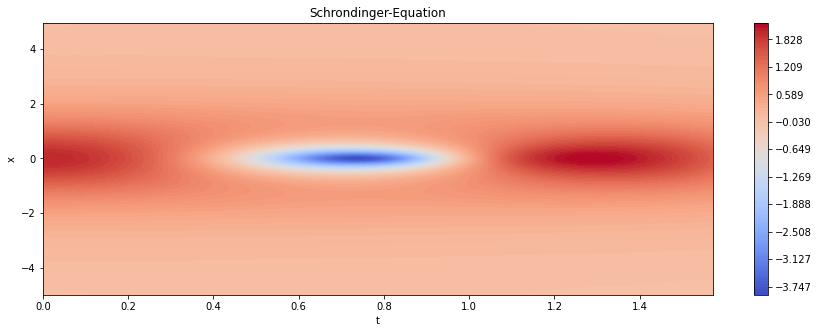

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from sklearn.model_selection import train_test_split

# Load the .mat file
mat_data = scipy.io.loadmat('NLS.mat')

# Following is the code to plot the data u vs x and t. u is 256*100
# matrix. Use first 75 columns for training and 25 for testing :)

# Access the variables stored in the .mat file
# The variable names in the .mat file become keys in the loaded dictionary
x = mat_data['x']
t = mat_data['tt']
u = mat_data['uu']

# Use the loaded variables as needed
print(x.shape)
print(t.shape)
print(u.shape)

X, T = np.meshgrid(x, t)
# Define custom color levels
c_levels = np.linspace(np.min(u), np.max(u), 100)

# Plot the contour
plt.figure()
plt.figure(figsize=(15, 5))
plt.contourf(T, X, u.T, levels=c_levels, cmap='coolwarm')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Schrondinger-Equation')
plt.colorbar()  # Add a colorbar for the contour levels
plt.show()

torch.Size([1, 40, 256])
final_time_output torch.Size([40, 256])
torch.Size([256])


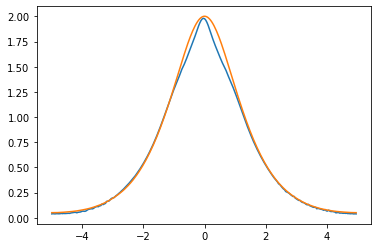

In [15]:
with torch.no_grad():
    hidden_pred = torch.zeros(1, batch_size, hidden_size)
    cell_pred = torch.zeros(1, batch_size, hidden_size)
    prediction, _ = lstm(test_tensor, (hidden_pred, cell_pred))
    
print(prediction.shape)

final_time_output = prediction[-1, :]
print("final_time_output", final_time_output.shape)

final_time_output1 = final_time_output[-1, :]
print(final_time_output1.shape)

final_out = final_time_output1.detach().numpy().reshape(-1,)
final_true = u[:,-1].reshape(-1,1)

final_true = np.abs(final_true)
final_out = np.abs(final_out)

plt.plot(x.T, final_out)
plt.plot(x.T, final_true)
plt.show()

In [16]:
# Convert NumPy arrays to PyTorch tensors
final_out_tensor = torch.from_numpy(final_out)
final_true_tensor = torch.from_numpy(final_true)
final_true_tensor = torch.abs(final_true_tensor)

# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean((final_out_tensor - final_true_tensor)**2)/torch.mean(final_true_tensor**2)
print("Relative Error Test: ", relative_error_test.item(), "")

Relative Error Test:  0.9748395915559801 
